In [2]:
import ccxt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ewtpy import EWT1D
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

/root/myCryptoBot/.venv/lib/python3.12/site-packages/numpy/_core/getlimits.py:545: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)
2024-12-30 12:07:44.775892: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-30 12:07:44.929371: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-30 12:07:45.164126: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1735571265.320837     273 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN

In [3]:
def read_invest_com_crypto_data(csv_file_path):
    try:
        # Read the CSV file
        df = pd.read_csv(csv_file_path)
        
        # Ensure the 'timestamp' column is in datetime format
        df['timestamp'] = pd.to_datetime(df['Date'])
        
        # Set the timestamp as the index
        df.set_index('timestamp', inplace=True)
        
        # Display the first few rows of the DataFrame
        print(df.head())
        
        # Display information about the DataFrame
        print(df.info())
        
        return df
    
    except FileNotFoundError:
        print("Error: The specified CSV file was not found.")
        return None
    
    except pd.errors.EmptyDataError:
        print("Error: The CSV file is empty.")
        return None
    
    except pd.errors.ParserError:
        print("Error: An error occurred while parsing the CSV file.")
        return None


In [4]:
# Fetch Ripple price data
df = read_invest_com_crypto_data("XRP Historical Data.csv")
df['Date']

                  Date   Price    Open    High     Low     Vol. Change %
timestamp                                                               
2024-12-29  12/29/2024  2.1497  2.1833  2.1967  2.1409  237.07M   -1.54%
2024-12-28  12/28/2024  2.1833  2.1461  2.2049  2.1341  272.04M    1.76%
2024-12-27  12/27/2024  2.1455  2.1555  2.2357  2.1185  579.33M   -0.46%
2024-12-26  12/26/2024  2.1555  2.2968  2.3143  2.1298  592.89M   -6.15%
2024-12-25  12/25/2024  2.2968  2.3230  2.3314  2.2622  335.32M   -1.12%
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3629 entries, 2024-12-29 to 2015-01-22
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3629 non-null   object 
 1   Price     3629 non-null   float64
 2   Open      3629 non-null   float64
 3   High      3629 non-null   float64
 4   Low       3629 non-null   float64
 5   Vol.      3430 non-null   object 
 6   Change %  3629 non-null   object 
dtypes: float6

timestamp
2024-12-29    12/29/2024
2024-12-28    12/28/2024
2024-12-27    12/27/2024
2024-12-26    12/26/2024
2024-12-25    12/25/2024
                 ...    
2015-01-26    01/26/2015
2015-01-25    01/25/2015
2015-01-24    01/24/2015
2015-01-23    01/23/2015
2015-01-22    01/22/2015
Name: Date, Length: 3629, dtype: object

In [5]:
df.head

<bound method NDFrame.head of                   Date   Price    Open    High     Low     Vol. Change %
timestamp                                                               
2024-12-29  12/29/2024  2.1497  2.1833  2.1967  2.1409  237.07M   -1.54%
2024-12-28  12/28/2024  2.1833  2.1461  2.2049  2.1341  272.04M    1.76%
2024-12-27  12/27/2024  2.1455  2.1555  2.2357  2.1185  579.33M   -0.46%
2024-12-26  12/26/2024  2.1555  2.2968  2.3143  2.1298  592.89M   -6.15%
2024-12-25  12/25/2024  2.2968  2.3230  2.3314  2.2622  335.32M   -1.12%
...                ...     ...     ...     ...     ...      ...      ...
2015-01-26  01/26/2015  0.0147  0.0170  0.0175  0.0147      NaN  -13.59%
2015-01-25  01/25/2015  0.0170  0.0174  0.0174  0.0156      NaN   -2.24%
2015-01-24  01/24/2015  0.0174  0.0160  0.0174  0.0150      NaN    8.69%
2015-01-23  01/23/2015  0.0160  0.0160  0.0170  0.0160      NaN    0.00%
2015-01-22  01/22/2015  0.0160  0.0152  0.0175  0.0152      NaN    5.19%

[3629 rows x 7 colum

In [6]:
# Use closing price for prediction
price_series = df['Price'].values

# Apply EWT decomposition
ewt, _, _ = EWT1D(price_series, N=3)
print(ewt.T.shape)
# Normalize the data
scaler = MinMaxScaler()

normalized_ewt = scaler.fit_transform(ewt.T)
print(scaler.scale_.shape)


(3, 3629)
(3629,)


In [7]:
normalized_ewt.shape

(3, 3629)

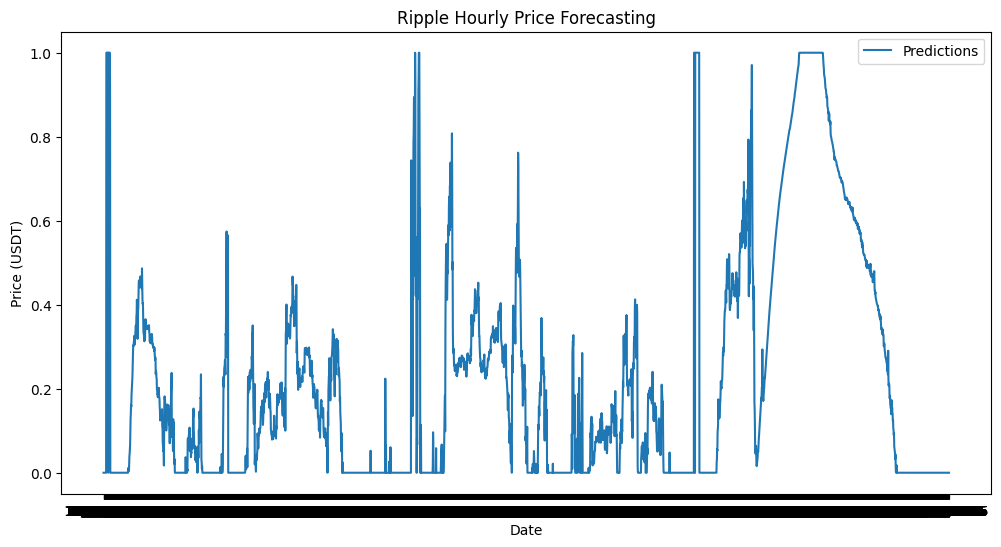

In [8]:
# Plot results

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], normalized_ewt[2], label='Predictions')
plt.title('Ripple Hourly Price Forecasting')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.legend()
plt.show()

In [9]:
# Function to prepare data for LSTM
def prepare_data(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

In [10]:
# Prepare data for each EWT component
seq_len = 90  # 24 hours for daily predictions
X_list = []
y_list = []

for comp in normalized_ewt:
    X, y = prepare_data(comp, seq_len)
    X_list.append(X.reshape(-1, seq_len, 1))
    y_list.append(y.reshape(-1, 1))

In [11]:
# Create LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        Input(input_shape),
        LSTM(50),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model


In [13]:
# Train separate LSTM models for each EWT component
models = []
for i in range(len(X_list)):
    model = create_lstm_model((seq_len, 1))
    model.fit(X_list[i], y_list[i], epochs=100, verbose=0, )
    models.append(model)


In [15]:
# Make predictions
predictions = np.zeros_like(price_series)
for i in range(seq_len, len(price_series)):
    print(i)
    inputs = normalized_ewt[:, i-seq_len:i]
    print(inputs.shape)
    pred = sum([m.predict(inputs[j:j+1].reshape(1, seq_len, 1)) for j, m in enumerate(models)])
    
    # Reshape the prediction to match the original data shape
    print(pred.shape)
    predictions[i] = pred

90
(3, 90)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
(1, 1)
91
(3, 90)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step

/tmp/ipykernel_273/4038019956.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predictions[i] = pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
(1, 1)
92
(3, 90)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
(1, 1)
93
(3, 90)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
(1, 1)
94
(3, 90)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
(1, 1)
95
(3, 90)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
(1, 1)
96
(3, 90)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
(1, 1)
97
(3, 90)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
(1, 1)
98
(3, 90)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

KeyboardInterrupt: 

(3629,)
(3629,)


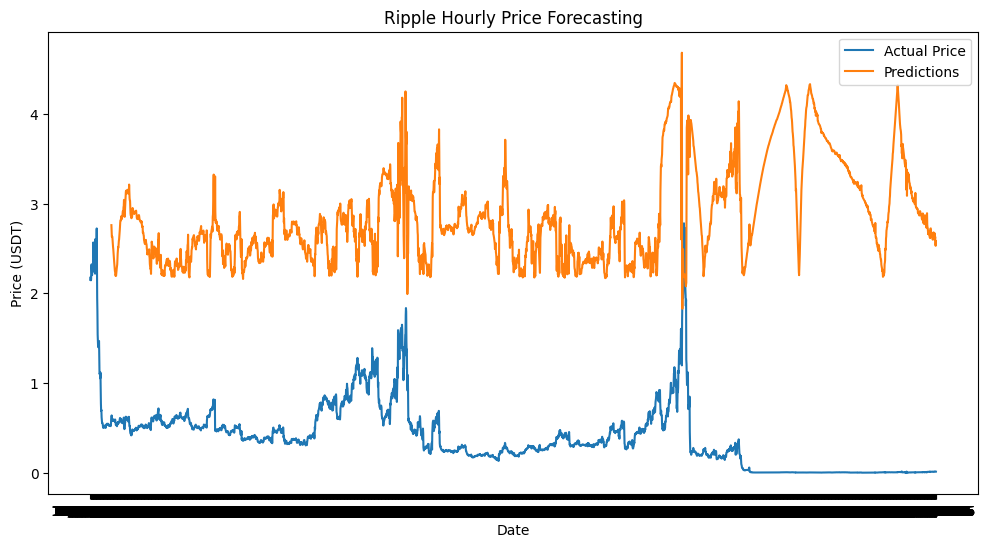

In [37]:
print(predictions.shape)
print(scaler.min_.shape)
reshaped = predictions.reshape(-1, 1)
new_scaler = MinMaxScaler().fit(reshaped)
predictions = new_scaler.inverse_transform(reshaped)


# Plot result
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], price_series, label='Actual Price')
plt.plot(df['Date'][seq_len:], predictions[seq_len:], label='Predictions')
plt.title('Ripple Hourly Price Forecasting')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.legend()
plt.show()


In [38]:
# Evaluate the model
mse = np.mean((price_series[seq_len:] - predictions[seq_len:]) ** 2)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")

RMSE: 2.5542
